In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 모델 생성 과정은 지금 알 필요 없다. 
#### 성별, 나이, 연봉을 변수로 차를 사는지 안사는지 예측하는 classifier를 만들었다(Logistic Regression 이용)

In [2]:
##import the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
X  = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

##Splitting the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##Fitting the Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
y_pred ## y_pred는 내가 모델을 통해 예측해낸 값 이것이 실제 값과 일치할까??
       ## cross validation을 통해 한눈에 볼 수 있다!

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [4]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm
## 65 와 24는 각각 1을 1로 0을 0으로 예측을 성공해낸 개수!
## 나머지 3과 8은 예측을 실패한 개수!
## 성공률은 89/100  = 89%

array([[65,  3],
       [ 8, 24]], dtype=int64)

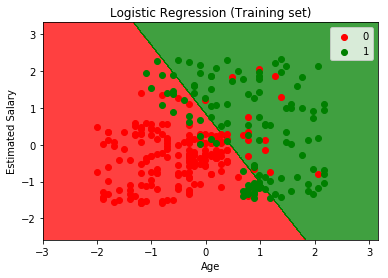

In [6]:
## 간단한 시각화 코드몰라도됨
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1,step=0.01),
                   np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max()+1,step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0], X_set[y_set == j,1],
               c= ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### 중간에 그어진 선은 내가 만든 모델이다
#### 왼쪽에 빨간 영역을 차를 안산 사람이라고 예측했지만 몇개의 초록점들이 보인다. 예측 실패한 경우를 의미
#### 마찬가지로 오른쪽 초록영역은 차를 산사람이라고 예측했지만 몇개의 빨간점들이 보인다. 예측을 실패한 점들이다


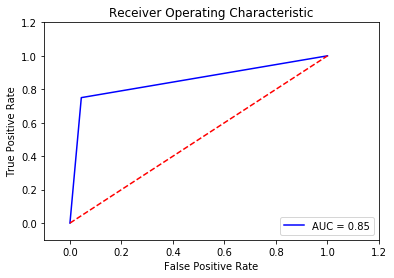

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,'b',label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
## 세로축은 True Positive의 비율 : 차를 산 사람을 정확히 예측
## 가로축은 False Positive의 비율 : 차를 안산 사람을 샀다고 잘못예측한 비율
## cutoff를 0.5로 두었을때 예측률이 89퍼정도 된다. 

#### Precision recall fscore support를 한번에 뽑을 수 있다

In [9]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test,y_pred)

In [10]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.89041096 0.88888889]
recall: [0.95588235 0.75      ]
fscore: [0.92198582 0.81355932]
support: [68 32]


## Cross Validation 
#### http://data-newbie.tistory.com/m/31참조

In [ ]:
## 데이터를 여러번 반복해서 나누고 여러 모델을 학습
## 주로 k겹 교차 검증 k는 특정 숫자 보통 5,10
## 데이터를 먼저 fold라고 하는 거의 비슷한 크기의 부분집합 "다섯"개로 나눔
## 이런식으로 다섯번의 분할마다 정확도 측정하여 다섯개의 정확도 얻음


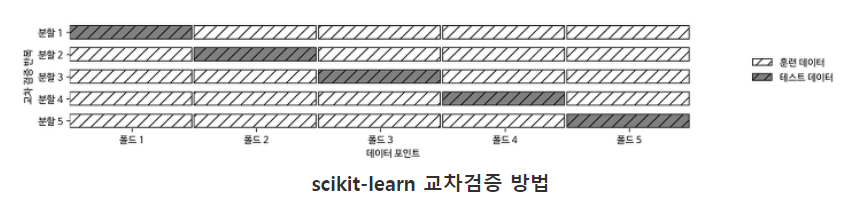

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target,cv=5)
print("교차 검증 점수: {}".format(scores))


교차 검증 점수: [1.         0.96666667 0.93333333 0.9        1.        ]


In [12]:
## 보통 교차 검증 점수 나온 점수들의 평균으로 정확도를 일반화 시킨다
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


#### 교차 검정의 장점
1. 운 좋게 훈련세트에 분류하기 어려운 샘플만 담겨져 있을 수 있다. 하지만 교차 검증을 사용하면 각 테스트세트에 각 샘플이 정확하게 한번씩 들어간다. 잘 일반화됨


2. 한번 분할 헀을 때보다 더 데이터를 효과적으로 사용가능하다. 



## 뒤에 그리드 서치는 세션때 다뤄주세용.....